# Data exploration - StatsBomb

This is an exploration of the available data from Statsbomb. We will use the Women's Euro 2022 (henceforth referred to as the Euros) as an example.

There are two ways of obtaining the free data made available by Statsbomb. We can either download the data from their [repo](https://github.com/statsbomb/open-data) (~6.5 GB), or access it from their API via the `statsbombpy` package. This example will use the latter:

In [2]:
from statsbombpy import sb

Note: Since we are using the Statsbomb API but not as a fee-paying customer, the API raises warnings that we can only access the free data. These warnings are annoying and suppressed:

In [3]:
import warnings

warnings.simplefilter("ignore")

## Data organisation
The dataset is organised into competitions (e.g. the Euros, La Liga 2012/2013 etc.), which describe leagues/tournaments. We can access this via `sb.competitions()`, where we are interested in row 40, representing the Euros (first 5 rows shown):

In [4]:
sb.competitions()[:5]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


where the `competition_id` is 53 and `season_id` is 106. 

We can access the all the matches in the Statsbomb database via `sb.matches()`, but here we filter for only the Euros matches:

In [5]:
sb.matches(competition_id=53, season_id=106)[:5]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3835331,2022-07-13,18:00:00.000,Europe - UEFA Women's Euro,2022,Sweden Women's,Switzerland Women's,2,1,available,...,2023-04-14T11:27:39.402579,2,Group Stage,Bramall Lane,Marta Huerta de Aza,Peter Gerhardsson,Nils Herbert Kromann Nielsen,1.1.0,2,2
1,3835324,2022-07-09,21:00:00.000,Europe - UEFA Women's Euro,2022,Netherlands Women's,Sweden Women's,1,1,available,...,2023-04-14T11:23:11.894822,1,Group Stage,Bramall Lane,Cheryl Foster,Mark Richard David Parsons,Peter Gerhardsson,1.1.0,2,2
2,3844384,2022-07-20,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Spain Women's,2,1,available,...,2023-04-26T02:03:52.207197,4,Quarter-finals,The American Express Community Stadium,Stéphanie Frappart,Sarina Glotzbach-Wiegman,Jorge Vilda,1.1.0,2,2
3,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2023-04-25T23:30:59.168837,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
4,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2023-04-26T00:44:10.275394,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2


We will focus on one match for now to examine the data available for each match. Naturally, we are picking the final (`match_id` 3847567).

Each match has lineup data, accessible via `sb.lineups()`:

In [6]:
match_id = 3847567
lineups = sb.lineups(match_id=match_id)

# type(lineups) is a dict keyed to each team
print(lineups.keys())
lineups["England Women's"][:5]

dict_keys(["England Women's", "Germany Women's"])


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,4637,Ellie Roebuck,None,21,England,[],[]
1,4641,Francesca Kirby,None,14,England,[],"[{'position_id': 19, 'position': 'Center Attac..."
2,4642,Millie Bright,None,6,England,[],"[{'position_id': 3, 'position': 'Right Center ..."
3,4643,Georgia Stanway,None,10,England,"[{'time': '21:51', 'card_type': 'Yellow Card',...","[{'position_id': 9, 'position': 'Right Defensi..."
4,4651,Demi Stokes,None,15,England,[],[]


Already, we can see some useful data, particularly positions, which happen to be uniquely id-ed. The breakdown of positions can be found in the [StatsBomb Open Data Specification](https://github.com/statsbomb/open-data/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf), in Appendix 1; in summary,

![](../img/positions.png)

## Events

Events are the core data points of the dataset. We can access all events for a particular match via `sb.events()`, which are ordered in chronological order (but not by timestamp, which is calculated from the start of the half):

In [7]:
events = sb.events(match_id=match_id)
events[:5]

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England Women's,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Germany Women's,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany Women's,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England Women's,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England Women's,00:00:00.000,Half Start,NaN


There is a huge list of event types, for which a comprehensive list is in the Open Data specification.

In [8]:
events.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Duel',
       'Clearance', 'Pressure', 'Ball Recovery', 'Carry', 'Miscontrol',
       'Interception', 'Block', 'Dispossessed', 'Dribble',
       'Dribbled Past', 'Shot', 'Goal Keeper', 'Foul Committed',
       'Foul Won', 'Offside', 'Injury Stoppage', '50/50', 'Half End',
       'Substitution', 'Tactical Shift', 'Player Off', 'Player On',
       'Error', 'Bad Behaviour'], dtype=object)

Let's examine a pass event as an example. Here are all the passes recorded:

In [9]:
events.loc[events.type == "Pass"][
    ["id", "minute", "timestamp", "player", "pass_recipient"]
][:5]

,id,minute,timestamp,player,pass_recipient
10,1d9a238d-785b-4b18-8f5f-c2044ee5a359,0,00:00:00.520,Bethany Mead,Millie Bright
11,c8417bb6-b907-4b0d-aedf-34f20609616a,0,00:00:03.345,Millie Bright,Ellen White
12,ac5d85b6-0638-43d0-bf18-0a9788da9796,0,00:00:10.646,Lauren Hemp,Rachel Daly
13,499127b0-bf54-4be1-b7b4-51e3cf62c67a,0,00:00:13.189,Rachel Daly,Keira Walsh
14,74ca4179-4401-4084-93ec-8164f159883f,0,00:00:15.803,Keira Walsh,Leah Williamson


In [10]:
event_index = 10
event = events.loc[event_index]
event.loc[~event.isnull()]

duration                                            2.824944
id                      1d9a238d-785b-4b18-8f5f-c2044ee5a359
index                                                      5
location                                        [61.0, 40.1]
match_id                                             3847567
minute                                                     0
pass_angle                                          2.938882
pass_body_part                                    Right Foot
pass_end_location                               [35.7, 45.3]
pass_height                                      Ground Pass
pass_length                                         25.82886
pass_recipient                                 Millie Bright
pass_type                                           Kick Off
period                                                     1
play_pattern                                   From Kick Off
player                                          Bethany Mead
player_id               

We can also obtain the 360 data for that event, which contains all the player positions at the time of the event:

In [11]:
frames = sb.frames(match_id=match_id)
event_frames = frames.loc[frames["id"] == event["id"]]
event_frames[:5]

,id,visible_area,match_id,teammate,actor,keeper,location
0,1d9a238d-785b-4b18-8f5f-c2044ee5a359,"[28.1765993115101, 80.0, 48.5861535161855, 0.0...",3847567,True,False,False,"[48.05163897170734, 50.22805548264369]"
1,1d9a238d-785b-4b18-8f5f-c2044ee5a359,"[28.1765993115101, 80.0, 48.5861535161855, 0.0...",3847567,True,False,False,"[49.77285231302967, 16.680445009910187]"
2,1d9a238d-785b-4b18-8f5f-c2044ee5a359,"[28.1765993115101, 80.0, 48.5861535161855, 0.0...",3847567,True,False,False,"[51.225962688003285, 35.87120428643644]"
3,1d9a238d-785b-4b18-8f5f-c2044ee5a359,"[28.1765993115101, 80.0, 48.5861535161855, 0.0...",3847567,True,False,False,"[58.43727917606544, 49.8341242147204]"
4,1d9a238d-785b-4b18-8f5f-c2044ee5a359,"[28.1765993115101, 80.0, 48.5861535161855, 0.0...",3847567,True,False,False,"[60.05816197394198, 28.907226445114212]"


We can plot the positions of all the players when that pass was made:

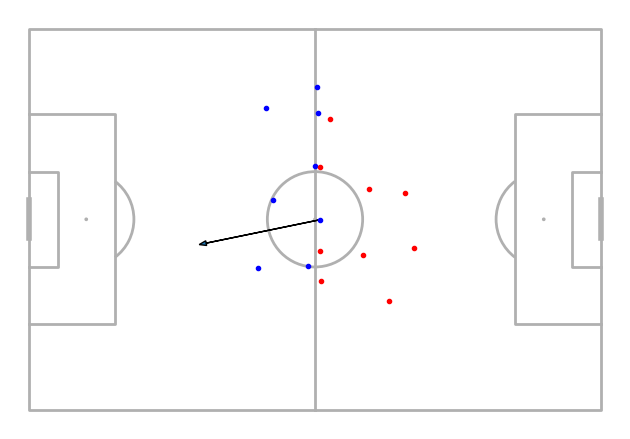

In [12]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch()
pitch.draw()

plt.plot(
    [x for (x, y) in event_frames["location"].loc[event_frames["teammate"] == True]],
    [y for (x, y) in event_frames["location"].loc[event_frames["teammate"] == True]],
    "b.",
)
plt.plot(
    [x for (x, y) in event_frames["location"].loc[event_frames["teammate"] == False]],
    [y for (x, y) in event_frames["location"].loc[event_frames["teammate"] == False]],
    "r.",
)


def plt_arrow(start: tuple, end: tuple):
    plt.arrow(
        start[0],
        start[1],
        end[0] - start[0],
        end[1] - start[1],
        head_width=1,
        length_includes_head=True,
    )


plt_arrow(event["location"], event["pass_end_location"])

Interestingly, we don't have player positions for players that are off-screen. Some matches also record the visible area in the 360 data, but it is not available for this game.

![](../img/pass_1.png)